
[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


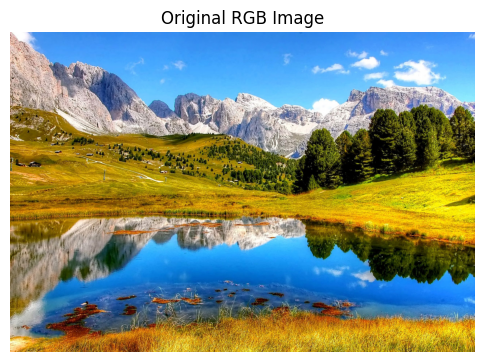


--- Showing RGB Channels ---


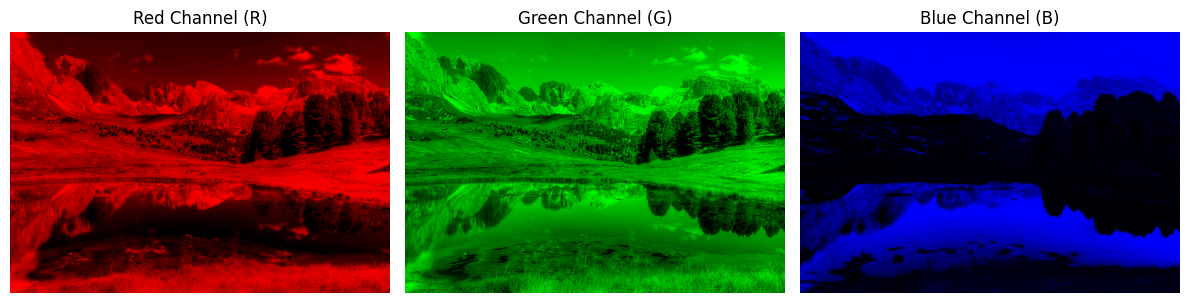

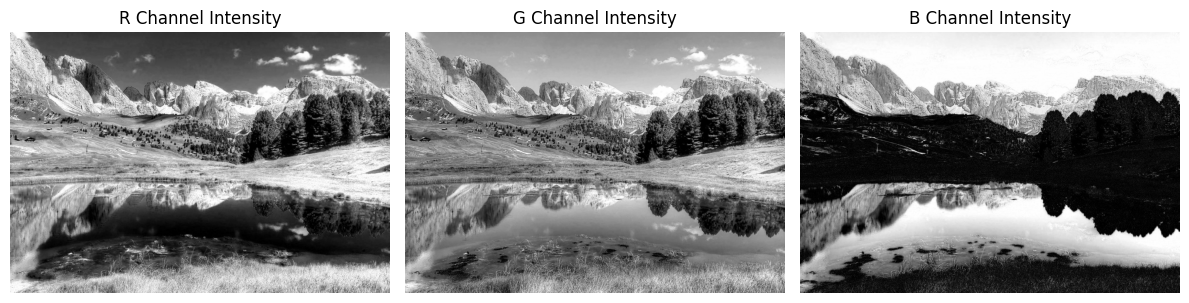


--- Showing HSV Channels ---


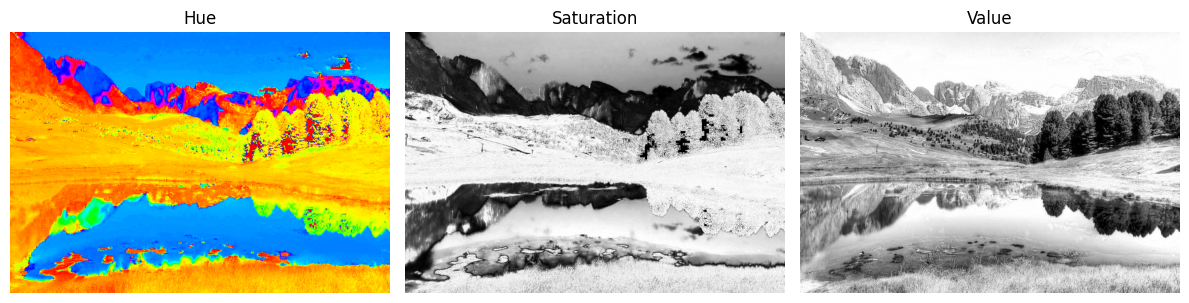

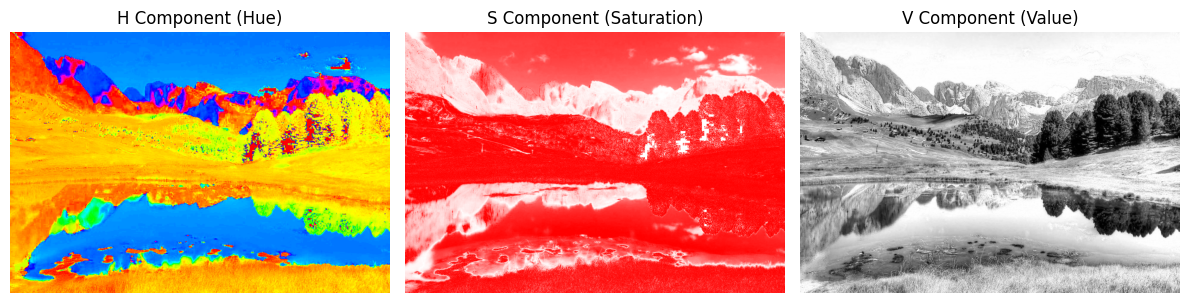


--- Modifying Regions ---


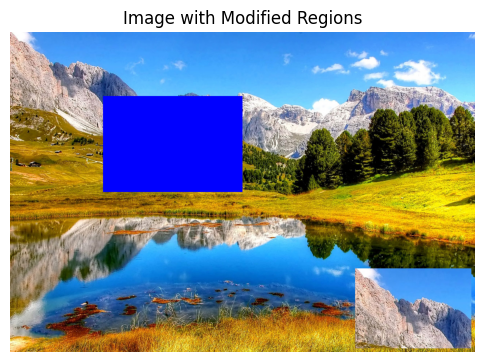


--- Showing Histograms ---


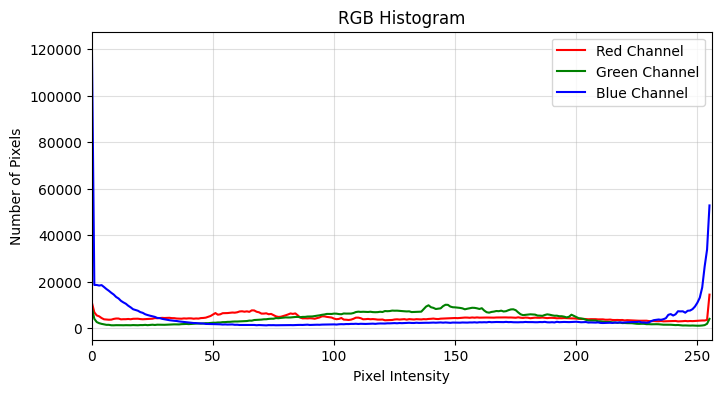

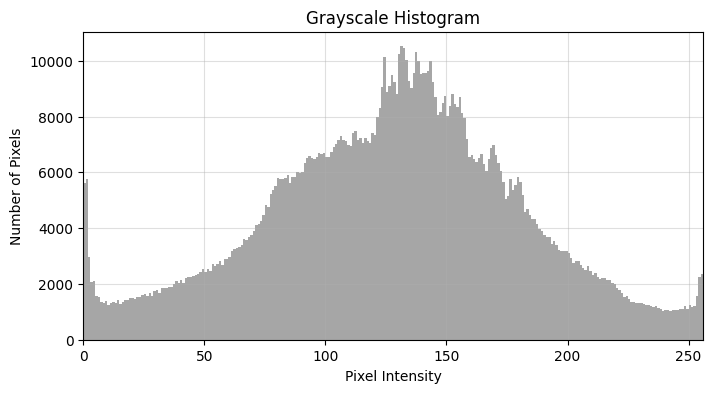


--- Interactive Brightness and Contrast Adjustment ---
Open the 'Brightness/Contrast Adjustment' window.
Move the sliders. Press 'ESC' to close.


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [ ]:
%pip install opencv-python numpy matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
# Note: ipywidgets is removed as we'll use cv2.createTrackbar for interactivity


# ---------------------------------------------
# Workshop: Pixel-level Image Manipulation
# Objectives:
# - Load image and separate RGB and HSV channels
# - Modify regions using slicing
# - Calculate and visualize histograms
# - Adjust brightness and contrast interactively
# ---------------------------------------------

# Image path (adjust according to your directory)
try:
    image_path = Path().cwd().parent / 'images' / 'landscape.jpg'
    if not image_path.exists():
        # Try looking in the current directory if not in parent
        image_path = Path().cwd() / 'images' / 'landscape.jpg'
    assert image_path.exists(), f"Image not found at {image_path} or {Path().cwd() / 'images'}"
except Exception as e:
    print(f"Error building path: {e}")
    raise FileNotFoundError("Please verify the path to 'landscape.jpg'")


# --- Main Functions ---

# 1. Load BGR image and convert to RGB
def load_image(path):
    """Load an image from the specified path."""
    img_bgr = cv2.imread(str(path))
    if img_bgr is None:
        raise IOError(f"Could not load image from {path}")
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    return img_bgr, img_rgb

# 2. Display original image
def show_image(img_rgb, title='Image', figsize=(6,6)):
    """Display an RGB image using Matplotlib."""
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# 3. Separate and display RGB channels
def show_rgb_channels(rgb):
    """Separate and display R, G, B channels of an RGB image."""
    R, G, B = cv2.split(rgb)
    
    # Create single-channel images for color visualization
    R_colored = np.zeros_like(rgb)
    G_colored = np.zeros_like(rgb)
    B_colored = np.zeros_like(rgb)
    
    # Assign each channel to its corresponding color component
    R_colored[:,:,0] = R
    G_colored[:,:,1] = G
    B_colored[:,:,2] = B
    
    # Display colored channels
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    colored_channels = [R_colored, G_colored, B_colored]
    names = ['Red Channel (R)', 'Green Channel (G)', 'Blue Channel (B)']
    
    for ax, channel, name in zip(axes, colored_channels, names):
        ax.imshow(channel)
        ax.set_title(name)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Also show channels in grayscale to see intensity
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    channels = [R, G, B]
    names = ['R Channel Intensity', 'G Channel Intensity', 'B Channel Intensity']
    
    for ax, channel, name in zip(axes, channels, names):
        ax.imshow(channel, cmap='gray')
        ax.set_title(name)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# 4. Convert and display HSV channels
def show_hsv_channels(bgr):
    """Convert image to HSV and display H, S, V channels."""
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(hsv)
    
    # Enhanced HSV visualization
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    
    # H channel (Hue) - use a cyclic colormap to represent hues
    axes[0].imshow(H, cmap='hsv')
    axes[0].set_title('Hue')
    axes[0].axis('off')
    
    # S channel (Saturation) - grayscale
    axes[1].imshow(S, cmap='gray')
    axes[1].set_title('Saturation')
    axes[1].axis('off')
    
    # V channel (Value) - grayscale
    axes[2].imshow(V, cmap='gray')
    axes[2].set_title('Value')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Create a more intuitive visualization of HSV space
    hsv_h = hsv.copy()
    hsv_h[:,:,1] = 255  # Maximum saturation
    hsv_h[:,:,2] = 255  # Maximum value
    
    hsv_s = hsv.copy()
    hsv_s[:,:,0] = 0    # Fixed hue (red)
    hsv_s[:,:,2] = 255  # Maximum value
    
    hsv_v = hsv.copy()
    hsv_v[:,:,0] = 0    # Fixed hue (red)
    hsv_v[:,:,1] = 0    # No saturation (grayscale)
    
    # Convert back to RGB for visualization
    rgb_h = cv2.cvtColor(hsv_h, cv2.COLOR_HSV2RGB)
    rgb_s = cv2.cvtColor(hsv_s, cv2.COLOR_HSV2RGB)
    rgb_v = cv2.cvtColor(hsv_v, cv2.COLOR_HSV2RGB)
    
    # Display HSV components in color
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    components = [rgb_h, rgb_s, rgb_v]
    names = ['H Component (Hue)', 'S Component (Saturation)', 'V Component (Value)']
    
    for ax, component, name in zip(axes, components, names):
        ax.imshow(component)
        ax.set_title(name)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# 5. Modify regions using slicing
def modify_regions(bgr):
    """Modify image regions: color rectangle and subregion copy."""
    img_modified = bgr.copy()
    h, w = img_modified.shape[:2]

    # a) Change color of a rectangular area (to blue BGR)
    x1_rect, y1_rect = w // 5, h // 5
    x2_rect, y2_rect = w // 2, h // 2
    img_modified[y1_rect:y2_rect, x1_rect:x2_rect] = [255, 0, 0]  # Blue in BGR

    # b) Replace a region with another part of the image (top left -> bottom right)
    src_h, src_w = h // 4, w // 4
    src_region = bgr[0:src_h, 0:src_w]

    dest_y1, dest_x1 = h - src_h - 10, w - src_w - 10
    dest_y2, dest_x2 = dest_y1 + src_h, dest_x1 + src_w

    img_modified[dest_y1:dest_y2, dest_x1:dest_x2] = src_region

    return img_modified

# 6. Calculate and display histograms
def show_histograms(rgb, bgr):
    """Calculate and display RGB and grayscale histograms."""
    # RGB histogram using Matplotlib
    plt.figure(figsize=(8, 4))
    colors = ('r', 'g', 'b')
    channel_names = ('Red', 'Green', 'Blue')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([rgb], [i], None, [256], [0, 256])
        plt.plot(hist, color=color, label=f'{channel_names[i]} Channel')
    plt.title('RGB Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Number of Pixels')
    plt.xlim([0, 256])
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()

    # Grayscale histogram using Matplotlib.hist
    gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
    plt.figure(figsize=(8, 4))
    plt.hist(gray.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
    plt.title('Grayscale Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Number of Pixels')
    plt.xlim([0, 256])
    plt.grid(alpha=0.4)
    plt.show()

# --- Script Execution ---

# Load the image
orig_bgr, orig_rgb = load_image(image_path)

# Display original image
show_image(orig_rgb, title='Original RGB Image')

# Display RGB and HSV channels
print("\n--- Showing RGB Channels ---")
show_rgb_channels(orig_rgb)
print("\n--- Showing HSV Channels ---")
show_hsv_channels(orig_bgr)

# Modify regions and show result
print("\n--- Modifying Regions ---")
modified_bgr = modify_regions(orig_bgr)
modified_rgb = cv2.cvtColor(modified_bgr, cv2.COLOR_BGR2RGB)
show_image(modified_rgb, title='Image with Modified Regions')

# Display histograms
print("\n--- Showing Histograms ---")
show_histograms(orig_rgb, orig_bgr)


# --- Bonus: Interactive Brightness and Contrast Adjustment with cv2.createTrackbar ---
print("\n--- Interactive Brightness and Contrast Adjustment ---")
print("Open the 'Brightness/Contrast Adjustment' window.")
print("Move the sliders. Press 'ESC' to close.")

# Global image for callback function
img_to_show = orig_bgr.copy()

def update_brightness_contrast(val):
    """Callback to update the image based on trackbars."""
    global img_to_show
    # Get trackbar values
    # Brightness (beta): Trackbar 0-200 -> Range -100 to 100
    brightness = cv2.getTrackbarPos('Brightness', 'Brightness/Contrast Adjustment') - 100
    # Contrast (alpha): Trackbar 1-30 -> Range 0.1 to 3.0
    contrast = cv2.getTrackbarPos('Contrast', 'Brightness/Contrast Adjustment') / 10.0
    # Ensure contrast is not zero
    if contrast == 0:
        contrast = 0.1

    # Apply adjustment using cv2.convertScaleAbs
    adjusted_img = cv2.convertScaleAbs(orig_bgr.copy(), alpha=contrast, beta=brightness)

    # Update displayed image
    img_to_show = adjusted_img
    cv2.imshow('Brightness/Contrast Adjustment', img_to_show)

# Create window and trackbars
cv2.namedWindow('Brightness/Contrast Adjustment')

# Create Trackbars:
# Brightness: Range 0-200, initial value 100 (represents brightness 0)
cv2.createTrackbar('Brightness', 'Brightness/Contrast Adjustment', 100, 200, update_brightness_contrast)
# Contrast: Range 1-30, initial value 10 (represents contrast 1.0)
cv2.createTrackbar('Contrast', 'Brightness/Contrast Adjustment', 10, 30, update_brightness_contrast)

# Initial call to display image with default values
update_brightness_contrast(0)

# Keep window open until ESC is pressed (code 27)
while True:
    try:
        if cv2.getWindowProperty('Brightness/Contrast Adjustment', cv2.WND_PROP_VISIBLE) < 1:
            break
    except cv2.error:
        print("Window closed externally.")
        break

    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # ESC key
        break

# Close all OpenCV windows when exiting
cv2.destroyAllWindows()
print("\nInteractive adjustment window closed.")
